## Phase transtion: 1D AntiFerroMagnetic state with Pulser

This tutorial introduces Pulser to build a sequence for studying an antiferromagnetic (AFM) state in an Ising-like model. The tutorial is based on a research paper [10.1103/PhysRevX.8.021070](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.021070), where arrays of Rydberg atoms were programmed and their correlations studied. The tutorial begins by showing the basics of Pulser: importing necessary modules and defining the pulse and register parameters. A pulse sequence is then created using objects from Pulser. The tutorial then demonstrates how to evaluate the quality of the obtained AFM state by calculating the spin-spin correlation function.

###  What is Pulser? 

It is an open-source Python software package and it provides easy-to-use libraries for designing and simulating pulse sequences that act on programmable arrays of neutral atoms

In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pcolormesh


from pulser import Pulse, Sequence, Register 
from pulser.waveforms import RampWaveform, BlackmanWaveform, ConstantWaveform
from pulser_simulation import QutipEmulator # emulator 
from pulser.devices import AnalogDevice, DigitalAnalogDevice,VirtualDevice, MockDevice # 

from dataclasses import replace # in order to update the Device properties

from qutip import *

#### if you do not have pulser

pip install pulser or check [Pulser installation](https://pulser.readthedocs.io/en/stable/installation.html#installation)

or try the following line: uncomment it and run it 

In [ ]:
#import sys
#!{sys.executable} -m pip install quitp

### Our Hamiltonian of neutral atoms

We are able to control systems of neutral atoms placed in fixed positions and 
interacting as dipoles




<center>
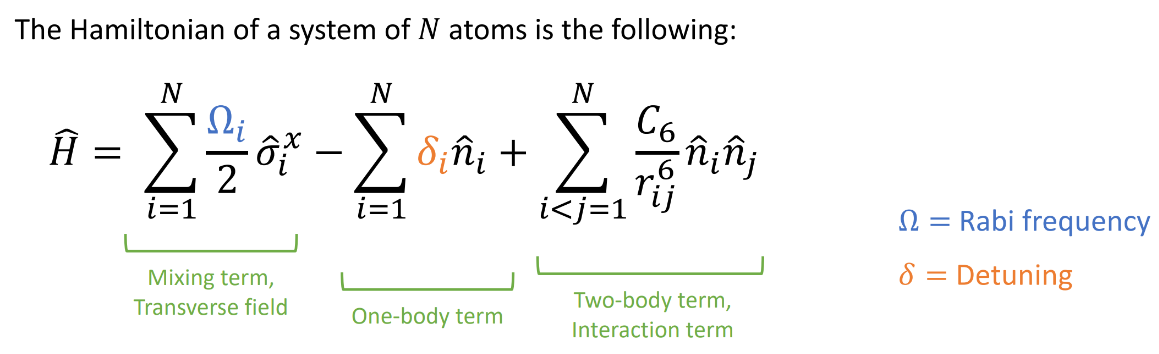
<center>
    
    
    


- Positive detuning on one atom lowers the energy of the system (excitation is energetically favoured)
- Two excitations close to each other increase the energy of the system (close excitations are energetically disfavoured)
- It’s a transverse field quantum Ising model, where the interaction strength depends on the distance between atoms

# Interaction term

The interaction term is related to the Rydberg Blockade Mechanism. The Rydberg Blockade Mechanism is a physical effect in neutral atom devices, where the presence of one atom in an excited Rydberg state prevents another atom from being excited to the same state with the same pulse, due to van der Waals interaction. This conditional excitation is key to entanglement generation between atoms in neutral atom devices.

<center>
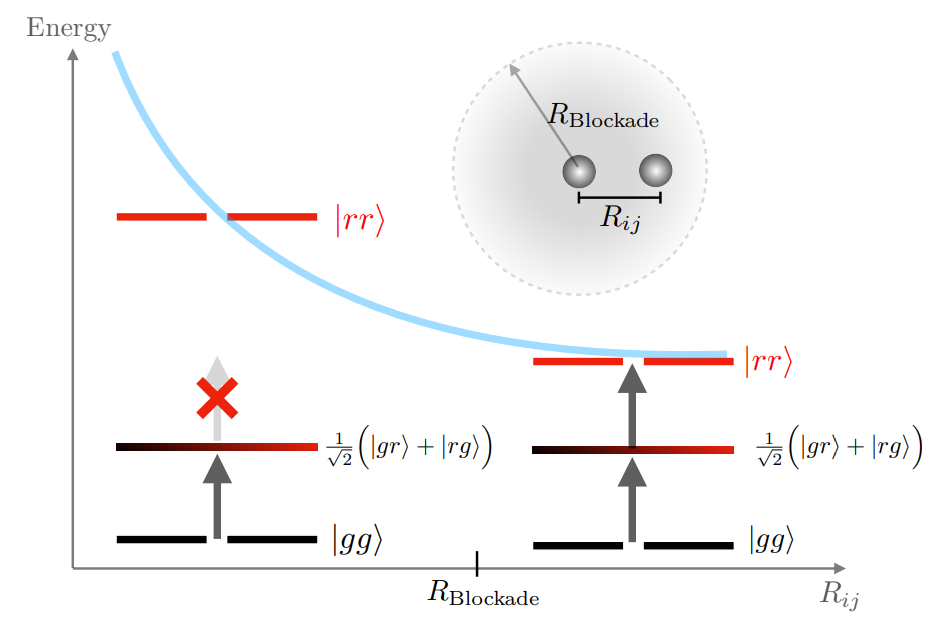
<center>
    
 
    

###  AFM state in a 1D - chain

We are going to generate AFM state for 1D chain system of 8 atoms. The sequence that we are going to use is the following:

<center>
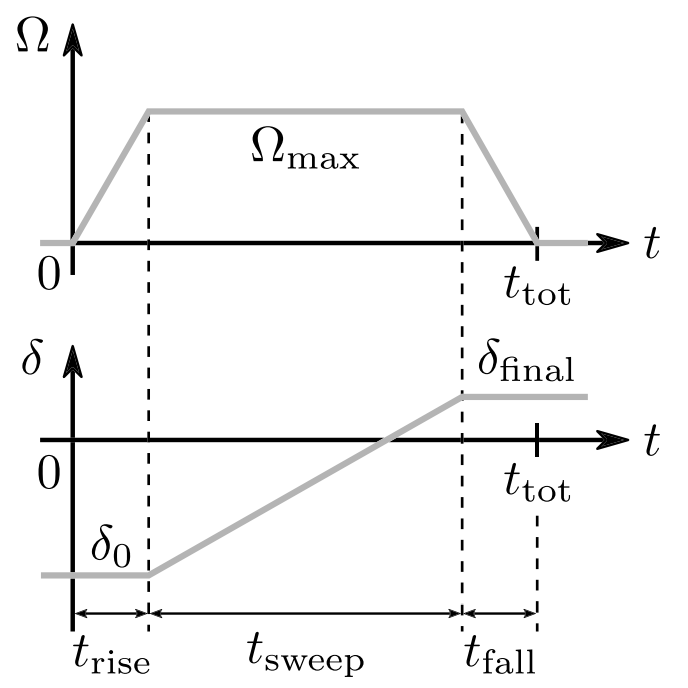
<center>
 
 
   

### The adiabatic theorem

We are going to use the adiabatic theorem in order to get the AFM state. Assume you have a time-dependent Hamiltonian where $H(t_0)$ has a known ground state that is easy to prepare, while $H(t_1)$ has an unknown ground-state that however corresponds to the solution of our problem.

We will use the adiabatic theorem in the following way. We will identify a Hamiltonian whose ground state is known and easy to prepare, and take it as our initial Hamiltonian $H(t_0)$. Then we will identify a second Hamiltonian
whose ground state is unknown, and take it as our final Hamiltonian $H(t_f)$.

### The phase diagram: 
The AFM state is located in the blue shaded region

<center>
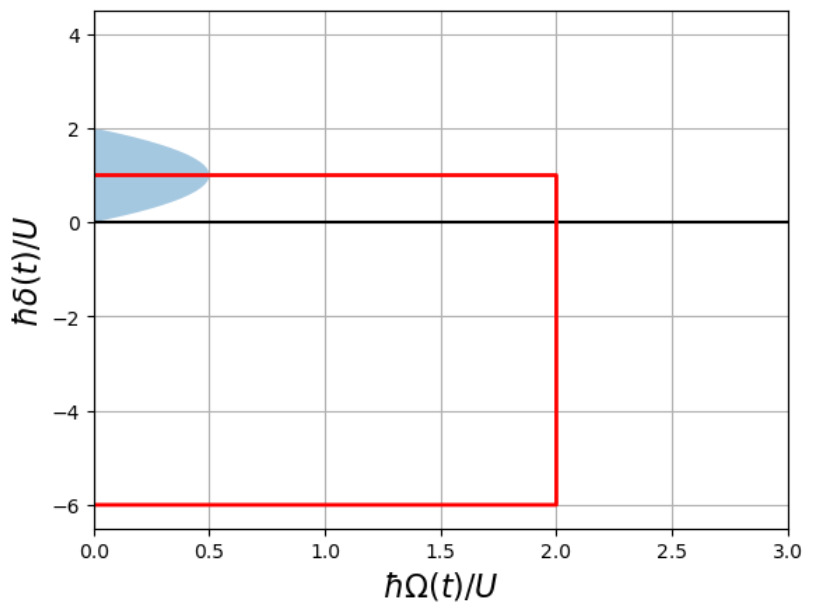
<center>

In [ ]:
# Parameters in rad/µs and ns

Omega_max = 2 * 2 * np.pi # Rabi frequency - amplitude
U = Omega_max / 2.0 # this is the interaction term 

delta_0 = -6* U
delta_f = 1* U

t_rise =  500# time for t_rise 
t_fall = 1000 # time for t_fall 

t_sweep = (delta_f - delta_0) / (2 * np.pi * 10) * 1000 # time for t_sweep 3000

R_interatomic = AnalogDevice.rydberg_blockade_radius(U)
print(f"Interatomic Radius is: {R_interatomic}µm.")

### 1D - chain register:  

The resgister is any arrangement of atoms in a quantum processor. In fact, we can place the atoms in arbitrary positions by specifying the positions of each one. 

For more information [check the Quickstart](https://pulser.readthedocs.io/en/stable/intro_rydberg_blockade.html)

The following is an example: 



<center>
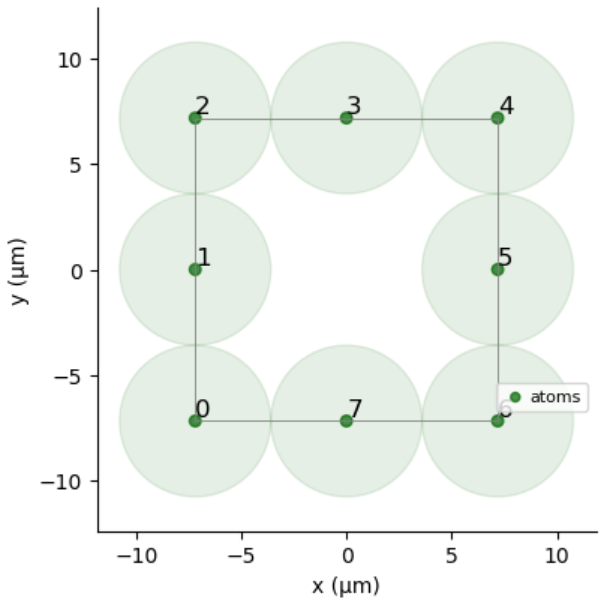
<center>

In [ ]:
# Define a function that returns the coordinates of the atoms in a square arrangement, 
# the function must be called square_perimeter_points(L) with L as
# the number of atoms by side. 
# The function should take the length of the square side as a parameter "L". 
# It should return a numpy array where each entry is a list containing the [x,y] coordinates of an atom. 
# Note: the atoms should follow a sequential order


#### START YOUR CODE

#def square_perimeter_points(L):

#return np.array(coord)

#### END YOUR CODE


coords = R_interatomic*square_perimeter_points(N_side)

In [ ]:
## Example: 

N_side = 3 # choose impair number of atoms, R_interatomic is the units

### Use the interatomic distance R_interatomic as the unit of length.

coords_solution_example = np.array([[-7.18676068, -7.18676068],
       [-7.18676068,  0.        ],
       [-7.18676068,  7.18676068],
       [ 0.        ,  7.18676068],
       [ 7.18676068,  7.18676068],
       [ 7.18676068,  0.        ],
       [ 7.18676068, -7.18676068],
       [ 0.        , -7.18676068]])
#The answer should look as the following
coords_solution_example/R_interatomic

### Register and drawing it

Using Register, add the previous list of positions to the Register. Also, check the distribution of your atoms by using draw. For more information check [the documentation](https://pulser.readthedocs.io/en/stable/tutorials/creating.html#1.-Creating-the-Register)

In [ ]:
#### START YOUR CODE


#### END YOUR CODE

### Defining the pulse: create and design a Pulse that will act on the Register

Check the plot of $\Omega$ vs $t$ and $\delta$ vs $t$ at the begging. 
Use waveforms with arguments: t_rise, t_sweep, t_fall, Omega_max in order to reproduce the plot $\Omega$ vs $t$ and $\delta$ vs $t$. 

Also, you can check [the following](https://pulser.readthedocs.io/en/stable/tutorials/creating.html#4.-Composing-the-Sequence)


In [ ]:
# code your waveforms: the output should be 3 variables 
#rise, sweep, fall as a Pulse(amplitud, detuning, phase=0.0)
# you have to use Waveforms in order to create amplitud and detuning



#### START YOUR CODE

#rise = None

#sweep = None

#fall = None


#### END YOUR CODE


Check how the sequence looks like by drawing it. It should look like as the 

In [ ]:
## adding the sequence to a Device. We are going to use AnalogDevice
seq = Sequence(reg,AnalogDevice)
seq.declare_channel("ising", "rydberg_global") # declare your channel

seq.add(pulse_rise, "ising")
seq.add(pulse_sweep, "ising")
seq.add(pulse_fall, "ising")

seq.draw(mode='input') 
#seq.draw(mode='input+output')

In [ ]:
#Check the phase diagram that you have created
# the blue shaded region is where you can find your AFM state
# the red line is the path that you are going to follow in order to find the AFM state
delta = []
omega = []
for x in seq._schedule["ising"]:
    if isinstance(x.type, Pulse):
        omega += list(x.type.amplitude.samples / U)
        delta += list(x.type.detuning.samples / U)

fig, ax = plt.subplots()
ax.grid(True, which="both")

ax.set_ylabel(r"$\hbar\delta(t)/U$", fontsize=16)
ax.set_xlabel(r"$\hbar\Omega(t)/U$", fontsize=16)
ax.set_xlim(0, 5)
ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")

y = np.arange(0.0, 4, 0.01)
x = -0.5*y**2+y # 1D
#x = 1.522 * (1 - 0.25 * (y - 2) ** 2) # for 2D square
ax.fill_between(x, y, alpha=0.4)

ax.plot(omega, delta, "red", lw=2)
plt.show()

### Running the sequence by using QuTiP

Use QutipEmulator and run in order to run the sequence. Check [the following](https://pulser.readthedocs.io/en/stable/tutorials/simulating.html#1.-Running-a-Simulation)


In [ ]:
#store the Hamiltonian in a variable called: simulation. Run the simulation and store the results in a variable 
# called: results
# use: sampling_rate=0.05

## START YOUR CODE

#simulation=None

#results = None

#### END YOUR CODE

### Results: bitstring 

After sampling the result, we can see what is our final state

In [ ]:
count = results.sample_final_state(N_samples=2000)

most_freq = {k: v for k, v in count.items() if v >30}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

### Evolution in time

We would like to see the evolution of the initial state using a heat map. We are going to use QuTiP in order to accomplis this.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
code a function called excited_occupation that calculates the excited state occupation of a given register position 

Example 1: in the case of N=3 atoms, the occupation of the first site (j=1) is: 



 $\ket{r} \bra{r} \otimes I \otimes I $
 
Example 2: in the case of N=4 atoms, the occupation of the 3th site (j=3) is

 $I\otimes I \otimes \ket{r} \bra{r}  \otimes I$
 
where $\ket{r}$ is the excited state
 
- the function should return a qutip tensor product 


In [ ]:
### START YOUR CODE

#def excited_occupation(j,N)


### END YOUR CODE

In [ ]:
# the following function will give us the probability of being in the excited state in each site
def qubit_density(num_atoms,state):
    deliver_list = []
    for i in range(num_atoms):
        result = qutip.expect(excited_occupation(i,num_atoms),state)
        deliver_list.append(result)

    return deliver_list

In [ ]:
density_time = [qubit_density(len(reg.qubits),results.states[y]) for y in range(len(results.states))] #getting the density for during the evolution 
times = results._sim_times*1000 # getting the time of the simulation

In [ ]:
## ploting the heat map
fig,ax = plt.subplots(figsize=(10, 5),layout="constrained")

qubitdensity = np.array(density_time)
num_time_points, positions = qubitdensity.shape
x, y = np.meshgrid(np.arange(num_time_points), np.arange(1, positions + 1))
im = pcolormesh(times, y, qubitdensity.T, shading="auto")
ax.set_xlabel("Time [ns]")
ax.set_ylabel("Qubit")
ax.set_title("State Density")
ax.set_yticks(np.arange(1, positions + 1))
cb = fig.colorbar(im, ax=ax)

### Assessing our final AFM state: staggered Magnetization

The staggered magnetization is defined by:

$$ M_{s}  = \sum _i ^ N  (-1)^i \bra{\psi} \sigma_z ^ {i}\ket{\psi}$$

In [1]:
def magnetization_occupation(j, N):
    prod = [qutip.qeye(2) for _ in range(N)]
    prod[j] =(-1)**(j)*qutip.sigmaz()
    return qutip.tensor(prod)

In [ ]:
def site_magnetization(num_atoms,state):
    deliver_list = []
    for i in range(num_atoms):
        result = qutip.expect(magnetization_occupation(i,num_atoms),state)
        deliver_list.append(result)

    return deliver_list

In [ ]:
#getting the density for during the evolution 
site_mag_time = [site_magnetization(len(reg.qubits),results.states[y]) for y in range(len(results.states))] 
times = results._sim_times*1000 # getting the time of the simulation

In [ ]:
## ploting the heat map

fig,ax = plt.subplots(figsize=(10, 5),layout="constrained")

magnet_density = np.array(site_mag_time)
num_time_points, positions = magnet_density.shape
x, y = np.meshgrid(np.arange(num_time_points), np.arange(1, positions + 1))
im = pcolormesh(times, y, magnet_density.T, shading="auto")
ax.set_xlabel("Time [ns]")
ax.set_ylabel("Qubit")
ax.set_title(" Magnetization")
ax.set_yticks(np.arange(1, positions + 1))
cb = fig.colorbar(im, ax=ax)

In [ ]:
## calculation of stagger magnetization
stagger_time = [sum(site_magnetization(len(reg.qubits),results.states[y])) for y in range(len(results.states))] #getting the density for during the evolution 
times = results._sim_times*1000 # getting the time of the simulation

In [ ]:
plt.plot(times,stagger_time)
plt.title("Staggered Magnetization")

plt.xlabel("time [ns]")
plt.grid()